In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option("display.max_columns", None)

In [2]:
games = pd.concat([pd.read_csv('../data/steam_games_cleaned_1.csv'), pd.read_csv('../data/steam_games_cleaned_2.csv'), pd.read_csv('../data/steam_games_cleaned_3.csv')], axis=0).drop('Unnamed: 0', axis=1)
print(games.shape)
games.head()

(56778, 473)


,appid,name,developer,publisher,positive,negative,userscore,owners,average_forever,average_2weeks,median_forever,median_2weeks,price,ccu,genre,arabic,bulgarian,czech,danish,dutch,english,finnish,french,german,greek,hungarian,italian,japanese,korean,norwegian,polish,portuguese,romanian,russian,simplifiedchinese,slovakian,spanish,swedish,thai,traditionalchinese,turkish,ukrainian,vietnamese,1980s,1990's,2.5D,2D,2D Fighter,2D Platformer,360 Video,3D,3D Fighter,3D Platformer,3D Vision,4 Player Local,4X,6DOF,8-bit Music,ATV,Abstract,Action,Action RPG,Action RTS,Action Roguelike,Action-Adventure,Addictive,Adventure,Agriculture,Aliens,Alternate History,Ambient,America,Animation & Modeling,Anime,Arcade,Archery,Arena Shooter,Artificial Intelligence,Assassin,Asymmetric VR,Asynchronous Multiplayer,Atmospheric,Audio Production,Auto Battler,Automation,Automobile Sim,BMX,Base-Building,Baseball,Based On A Novel,Basketball,Batman,Battle Royale,Beat 'em up,Beautiful,Benchmark,Bikes,Blood,Board Game,Boss Rush,Bowling,Boxing,Building,Bullet Hell,Bullet Time,CRPG,Capitalism,Card Battler,Card Game,Cartoon,Cartoony,Casual,Cats,Character Action Game,Character Customization,Chess,Choices Matter,Choose Your Own Adventure,Cinematic,City Builder,Class-Based,Classic,Clicker,Co-op,Co-op Campaign,Cold War,Collectathon,Colony Sim,Colorful,Combat,Combat Racing,Comedy,Comic Book,Competitive,Conspiracy,Controller,Conversation,Cooking,Crafting,Creature Collector,Crime,Crowdfunded,Cult Classic,Cute,Cyberpunk,Cycling,Dark,Dark Comedy,Dark Fantasy,Dark Humor,Dating Sim,Deckbuilding,Demons,Design & Illustration,Destruction,Detective,Difficult,Dinosaurs,Diplomacy,Documentary,Dog,Dragons,Drama,Driving,Dungeon Crawler,Dungeons & Dragons,Dynamic Narration,Dystopian,Early Access,Economy,Education,Electronic,Electronic Music,Emotional,Epic,Episodic,Escape Room,Experience,Experimental,Exploration,FMV,FPS,Faith,Family Friendly,Fantasy,Farming,Farming Sim,Fast-Paced,Feature Film,Female Protagonist,Fighting,First-Person,Fishing,Flight,Football,Foreign,Free to Play,Funny,Futuristic,Gambling,Game Development,GameMaker,Games Workshop,Gaming,God Game,Golf,Gore,Gothic,Grand Strategy,Great Soundtrack,Grid-Based Movement,Gun Customization,Hack and Slash,Hacking,Hand-drawn,Hardware,Heist,Hentai,Hero Shooter,Hex Grid,Hidden Object,Historical,Hockey,Horror,Horses,Hunting,Idler,Illuminati,Immersive,Immersive Sim,Indie,Instrumental Music,Intentionally Awkward Controls,Interactive Fiction,Inventory Management,Investigation,Isometric,JRPG,Jet,Kickstarter,LEGO,LGBTQ+,Lara Croft,Lemmings,Level Editor,Life Sim,Linear,Local Co-Op,Local Multiplayer,Logic,Loot,Looter Shooter,Lore-Rich,Lovecraftian,MMORPG,MOBA,Magic,Management,Mars,Martial Arts,Massively Multiplayer,Masterpiece,Match 3,Mature,Mechs,Medical Sim,Medieval,Memes,Metroidvania,Military,Mini Golf,Minigames,Minimalist,Mining,Mod,Moddable,Modern,Motocross,Motorbike,Mouse only,Movie,Multiplayer,Multiple Endings,Music,Music-Based Procedural Generation,Mystery,Mystery Dungeon,Mythology,NSFW,Narration,Narrative,Nature,Naval,Naval Combat,Ninja,Noir,Nonlinear,Nostalgia,Nudity,Offroad,Old School,On-Rails Shooter,Online Co-Op,Open World,Open World Survival Craft,Otome,Outbreak Sim,Parkour,Parody,Party,Party Game,Party-Based RPG,Perma Death,Philosophical,Photo Editing,Physics,Pinball,Pirates,Pixel Graphics,Platformer,Point & Click,Political,Political Sim,Politics,Pool,Post-apocalyptic,Precision Platformer,Procedural Generation,Programming,Psychedelic,Psychological,Psychological Horror,Puzzle,Puzzle-Platformer,PvE,PvP,Quick-Time Events,RPG,RPGMaker,RTS,Racing,Real Time Tactics,Real-Time,Real-Time with Pause,Realistic,Reboot,Relaxing,Remake,Replay Value,Resource Management,Retro,Rhythm,Robots,Rock Music,Rogue-like,Rogue-lite,Roguelike Deckbuilder,Roguevania,Romance,Rome,Runner,Sailing,Sandbox,Satire,Sci-fi,Science,Score Attack,Sequel,Sexual Content,Shoot 'Em Up,Shooter,Short,Side Scroller,Silent Protagonist,Simulation,Singleplayer,Skateboarding,Skat

In [3]:
games.isna().sum().sum()

0

In [4]:
# games in each owner count category
games['owners'].value_counts()

0 .. 20,000                   42118
20,000 .. 50,000               5997
50,000 .. 100,000              2996
100,000 .. 200,000             2103
200,000 .. 500,000             1865
500,000 .. 1,000,000            812
1,000,000 .. 2,000,000          457
2,000,000 .. 5,000,000          298
5,000,000 .. 10,000,000          75
10,000,000 .. 20,000,000         37
20,000,000 .. 50,000,000         16
50,000,000 .. 100,000,000         3
100,000,000 .. 200,000,000        1
Name: owners, dtype: int64

In [5]:
# most owned game on steam
games[games['owners'] == '100,000,000 .. 200,000,000']

,appid,name,developer,publisher,positive,negative,userscore,owners,average_forever,average_2weeks,median_forever,median_2weeks,price,ccu,genre,arabic,bulgarian,czech,danish,dutch,english,finnish,french,german,greek,hungarian,italian,japanese,korean,norwegian,polish,portuguese,romanian,russian,simplifiedchinese,slovakian,spanish,swedish,thai,traditionalchinese,turkish,ukrainian,vietnamese,1980s,1990's,2.5D,2D,2D Fighter,2D Platformer,360 Video,3D,3D Fighter,3D Platformer,3D Vision,4 Player Local,4X,6DOF,8-bit Music,ATV,Abstract,Action,Action RPG,Action RTS,Action Roguelike,Action-Adventure,Addictive,Adventure,Agriculture,Aliens,Alternate History,Ambient,America,Animation & Modeling,Anime,Arcade,Archery,Arena Shooter,Artificial Intelligence,Assassin,Asymmetric VR,Asynchronous Multiplayer,Atmospheric,Audio Production,Auto Battler,Automation,Automobile Sim,BMX,Base-Building,Baseball,Based On A Novel,Basketball,Batman,Battle Royale,Beat 'em up,Beautiful,Benchmark,Bikes,Blood,Board Game,Boss Rush,Bowling,Boxing,Building,Bullet Hell,Bullet Time,CRPG,Capitalism,Card Battler,Card Game,Cartoon,Cartoony,Casual,Cats,Character Action Game,Character Customization,Chess,Choices Matter,Choose Your Own Adventure,Cinematic,City Builder,Class-Based,Classic,Clicker,Co-op,Co-op Campaign,Cold War,Collectathon,Colony Sim,Colorful,Combat,Combat Racing,Comedy,Comic Book,Competitive,Conspiracy,Controller,Conversation,Cooking,Crafting,Creature Collector,Crime,Crowdfunded,Cult Classic,Cute,Cyberpunk,Cycling,Dark,Dark Comedy,Dark Fantasy,Dark Humor,Dating Sim,Deckbuilding,Demons,Design & Illustration,Destruction,Detective,Difficult,Dinosaurs,Diplomacy,Documentary,Dog,Dragons,Drama,Driving,Dungeon Crawler,Dungeons & Dragons,Dynamic Narration,Dystopian,Early Access,Economy,Education,Electronic,Electronic Music,Emotional,Epic,Episodic,Escape Room,Experience,Experimental,Exploration,FMV,FPS,Faith,Family Friendly,Fantasy,Farming,Farming Sim,Fast-Paced,Feature Film,Female Protagonist,Fighting,First-Person,Fishing,Flight,Football,Foreign,Free to Play,Funny,Futuristic,Gambling,Game Development,GameMaker,Games Workshop,Gaming,God Game,Golf,Gore,Gothic,Grand Strategy,Great Soundtrack,Grid-Based Movement,Gun Customization,Hack and Slash,Hacking,Hand-drawn,Hardware,Heist,Hentai,Hero Shooter,Hex Grid,Hidden Object,Historical,Hockey,Horror,Horses,Hunting,Idler,Illuminati,Immersive,Immersive Sim,Indie,Instrumental Music,Intentionally Awkward Controls,Interactive Fiction,Inventory Management,Investigation,Isometric,JRPG,Jet,Kickstarter,LEGO,LGBTQ+,Lara Croft,Lemmings,Level Editor,Life Sim,Linear,Local Co-Op,Local Multiplayer,Logic,Loot,Looter Shooter,Lore-Rich,Lovecraftian,MMORPG,MOBA,Magic,Management,Mars,Martial Arts,Massively Multiplayer,Masterpiece,Match 3,Mature,Mechs,Medical Sim,Medieval,Memes,Metroidvania,Military,Mini Golf,Minigames,Minimalist,Mining,Mod,Moddable,Modern,Motocross,Motorbike,Mouse only,Movie,Multiplayer,Multiple Endings,Music,Music-Based Procedural Generation,Mystery,Mystery Dungeon,Mythology,NSFW,Narration,Narrative,Nature,Naval,Naval Combat,Ninja,Noir,Nonlinear,Nostalgia,Nudity,Offroad,Old School,On-Rails Shooter,Online Co-Op,Open World,Open World Survival Craft,Otome,Outbreak Sim,Parkour,Parody,Party,Party Game,Party-Based RPG,Perma Death,Philosophical,Photo Editing,Physics,Pinball,Pirates,Pixel Graphics,Platformer,Point & Click,Political,Political Sim,Politics,Pool,Post-apocalyptic,Precision Platformer,Procedural Generation,Programming,Psychedelic,Psychological,Psychological Horror,Puzzle,Puzzle-Platformer,PvE,PvP,Quick-Time Events,RPG,RPGMaker,RTS,Racing,Real Time Tactics,Real-Time,Real-Time with Pause,Realistic,Reboot,Relaxing,Remake,Replay Value,Resource Management,Retro,Rhythm,Robots,Rock Music,Rogue-like,Rogue-lite,Roguelike Deckbuilder,Roguevania,Romance,Rome,Runner,Sailing,Sandbox,Satire,Sci-fi,Science,Score Attack,Sequel,Sexual Content,Shoot 'Em Up,Shooter,Short,Side Scroller,Silent Protagonist,Simulation,Singleplayer,Skateboarding,Skat

In [6]:
# top 20 developers with the most games on steam
games['developer'].value_counts().sort_values(ascending=False)[:20]

Choice of Games               135
Laush Dmitriy Sergeevich      104
Creobit                       102
KOEI TECMO GAMES CO., LTD.     92
Sokpop Collective              88
Boogygames Studios             86
Hosted Games                   76
Blender Games                  71
Elephant Games                 69
Ripknot Systems                62
RewindApp                      62
AMAX Interactive               59
Individual Software            59
Somer Games                    57
SEGA                           55
Eipix Entertainment            54
Nikita "Ghost_RUS"             51
William at Oxford              50
ImperiumGame                   45
Dharker Studio                 41
Name: developer, dtype: int64

In [7]:
# top 20 biggest publishers
games['publisher'].value_counts().sort_values(ascending=False)[:20]

Big Fish Games                413
8floor                        160
Strategy First                156
SEGA                          140
Choice of Games               135
Square Enix                   134
Sekai Project                 131
Ubisoft                       125
Laush Studio                  123
HH-Games                      123
THQ Nordic                    117
Plug In Digital               115
1C Entertainment              109
Ziggurat                      107
Degica                        103
Slitherine Ltd.                99
Alawar Entertainment           98
Devolver Digital               93
KOEI TECMO GAMES CO., LTD.     93
Sokpop Collective              90
Name: publisher, dtype: int64

<AxesSubplot:>

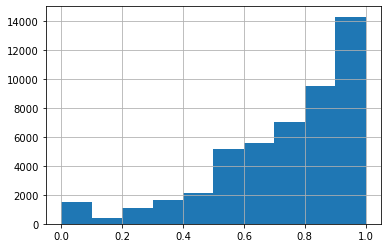

In [8]:
games['score_adj'] = games['positive']/(games['positive']+games['negative'])
games['score_adj'].hist()